##Name: Ameer Hamza
##Email: ameer4955@gmail.com
#1. Observe the dataset and

In [10]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = "ignore", category= FutureWarning)

In [11]:
full_data = pd.read_csv("diabetes.csv")

In [12]:
full_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# renaming column head to a shorter version
full_data = full_data.rename(columns = {"DiabetesPedigreeFunction": "pedigree"})
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We only have int64 and float64 datatypes in our dataset, that means it is perfect to use. We can't judge impotance of any feature before EDA.

#2. Perform EDA on the Dataset Which should include
##2.a. Visualization and explore the data using seaborn

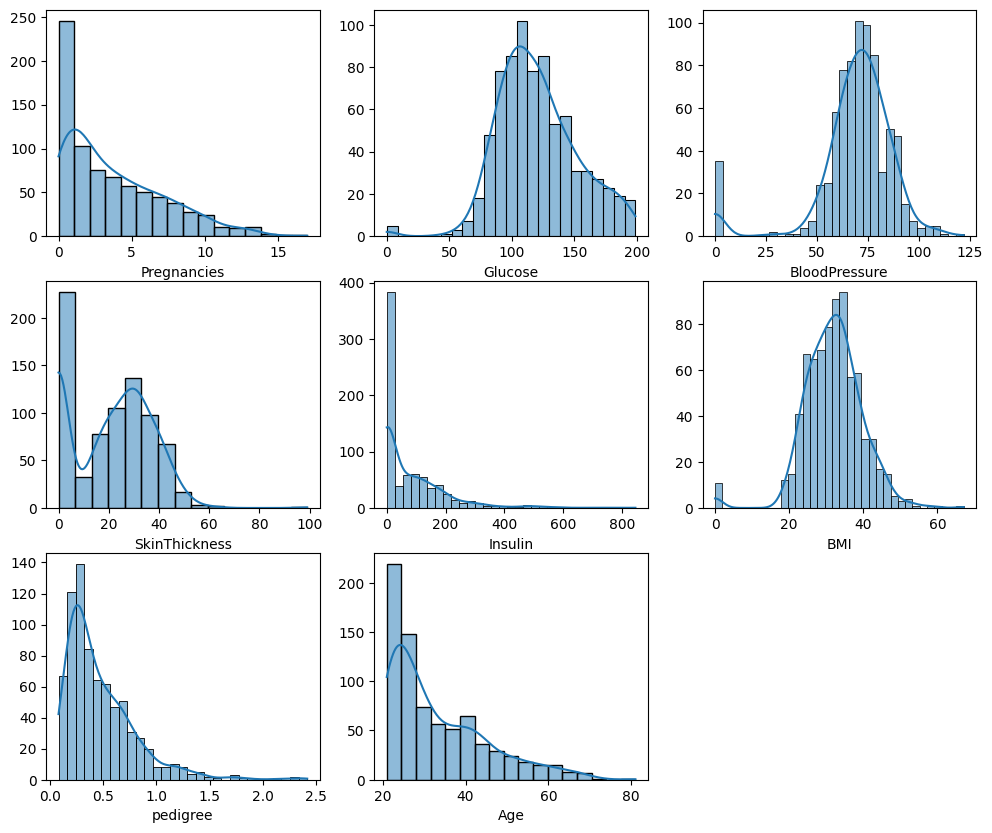

In [14]:
fig = plt.figure(figsize=(12, 10))

for i in range(8):
    fig.add_subplot(3, 3, i+1)
    sns.histplot(full_data[full_data.columns[i]], kde= True)
    plt.ylabel("")
plt.show()

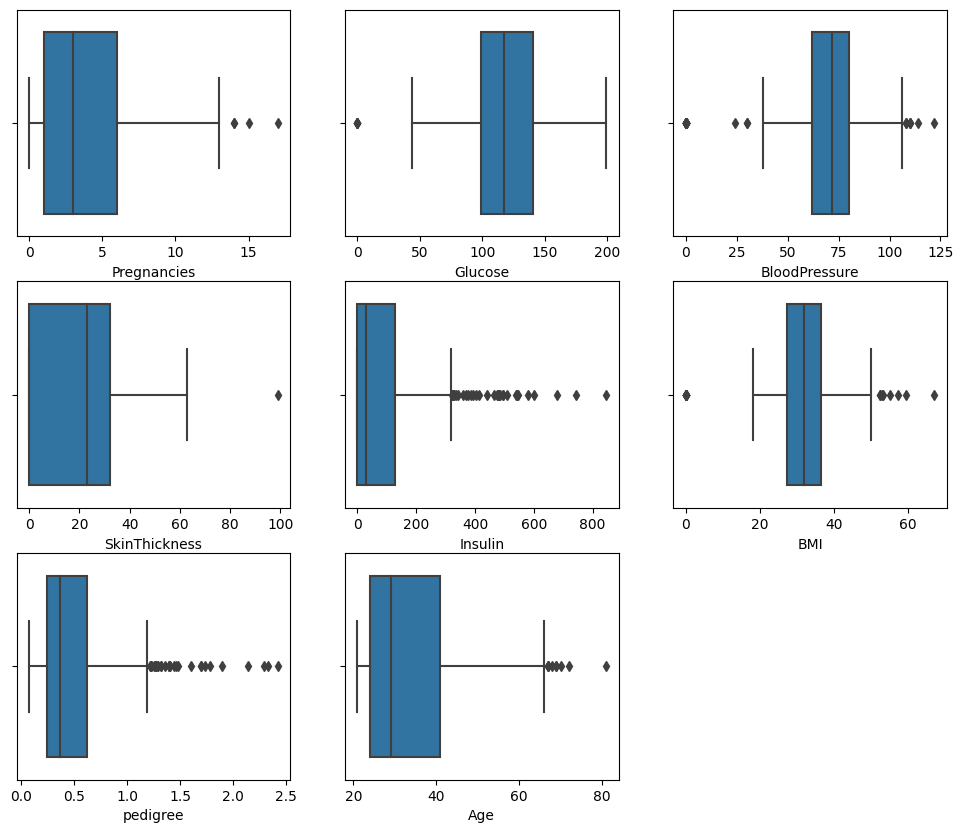

In [15]:
fig = plt.figure(figsize=(12, 10))

for i in range(8):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(x = full_data[full_data.columns[i]])
    plt.ylabel("")
plt.show()

##2.a.i. Add your findings about the data under each graph in the code notebook
I have used histplot and box plot to plot data as these are the most used and esay to read graphs.
In histplot, we have the feature name on x axis and feature count on y axis.


##2.b. Identify the data patterns if exist for single/multiple variables

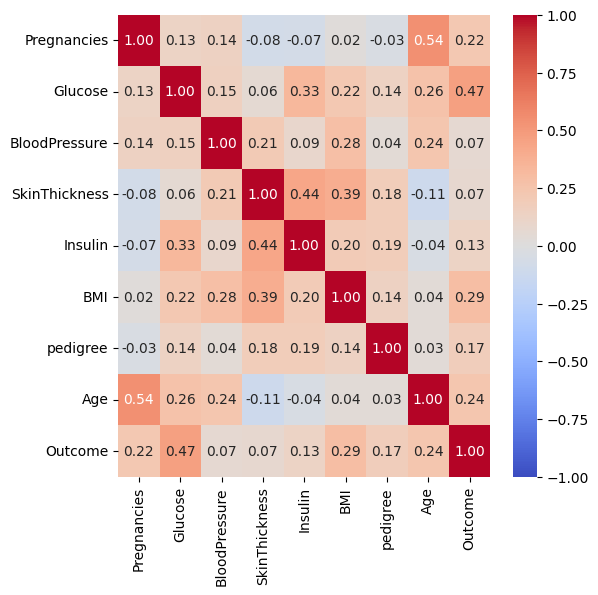

In [16]:
correl = full_data.corr()
plt.subplots(figsize=(6, 6))
sns.heatmap(correl, cmap = "coolwarm", annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

##2.b.i. Write your findings under the plots or code that identify the pattern
In above heatmap, we can see that there is no dark blue box which indicates that all attributes have positive relation (directly proportonal) with each other or have a very weak relation. Only Age, Glucose and BMI showed some degree of positive relation with other attributes.

##2.c. Clean the dataset, remove the missing values as mentioned in the Lectures 15.

In [17]:
# dropping empty values
full_data.dropna(inplace= True)

# removing duplicate from dataset
full_data = full_data.drop_duplicates()

full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


##2.c.i. Explain your approach in the Collab notebook text cell
As shown in step 1, this dataset don't have any missing value but we still used drop_duplicates and drop_na functions as a good pratice to pre-process our data.

##2.d. Select the target variable and clearly mention the reason for selecting it.
I selected outcome feature because we are interested in differentiating healthy and diseased cases in presence of some data from the real world.

##2.e. Transform the Dataset
##2.e.i. Transform the whole dataset (Features , Target Variable)

In [18]:
# each column except Outcome is our feature
x = full_data.drop(["Outcome"], axis= 1)

# Outcome is assigned to y as it is our target variable
y = full_data["Outcome"]

##2.f. Split the Dataset into train and test set

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .10, random_state= 101)

#3. Use the Scikit Learn Library to Make the Classification Models
##3.a. Use the different regression models

##3.a.i. Logistic regression regression


In [20]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)

Logistic Regression


##3.a.ii. Decision tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)

Decision Tree Classifier


##3.a.iii. Random forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

# prediction from the model
y_pred_rfc = rfc.predict(x_test)

Random Forest Classifier



##3.a.iv. Gradient boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

print('Gradient Boosting Classifier')
# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

# prediction from the model
y_pred_gbc = gbc.predict(x_test)

Gradient Boosting Classifier


#4.a. You have to report the result with the following combinations
##Make the Confusion Matrix, Report the Accuracy, Precision and Recall

##4.a.i. Without feature scaling

Logistic Regression without feature scaling
--------------------
Accuracy 80.52 %
Precision: 0.71
Recall: 0.62
--------------------


<Axes: >

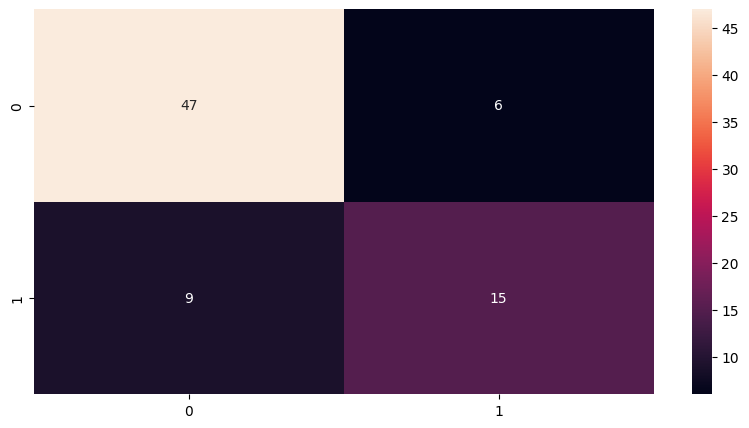

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Score It
print('Logistic Regression without feature scaling')
# Accuracy
print('--'*10)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(confusion, annot=True, fmt="d")

Decision Tree Classifier without feature scaling
--------------------
Accuracy 68.83 %
Precision: 0.50
Recall: 0.67
--------------------


<Axes: >

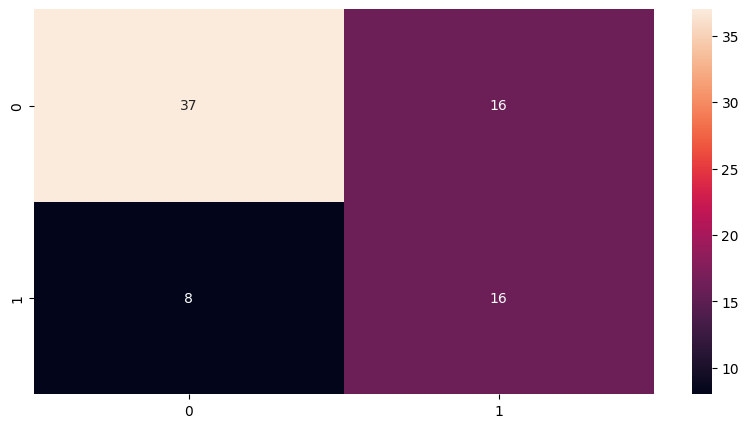

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print('Decision Tree Classifier without feature scaling')
# Accuracy
print('--'*10)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, y_pred_Dtree)
recall = recall_score(y_test, y_pred_Dtree)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_Dtree)

sns.heatmap(confusion, annot=True, fmt="d")

Random Forest Classifier without feature scaling
--------------------
Accuracy 79.22 %
Precision: 0.67
Recall: 0.67
--------------------


<Axes: >

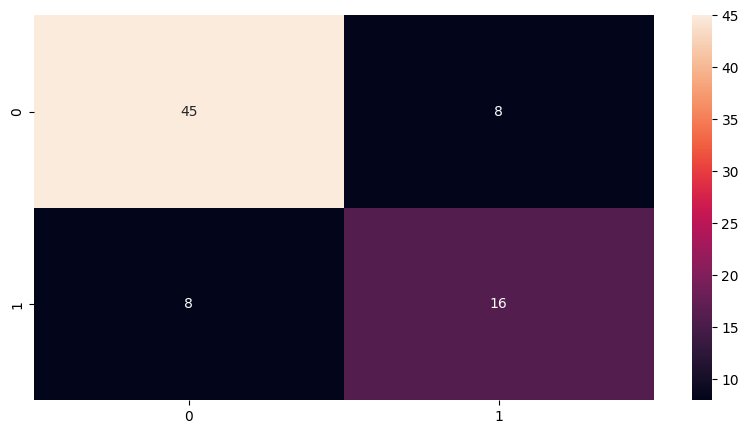

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print('Random Forest Classifier without feature scaling')
# Accuracy
print('--'*10)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

Gradient Boosting Classifier without feature scaling
--------------------
Accuracy 74.03 %
Precision: 0.58
Recall: 0.62
--------------------


<Axes: >

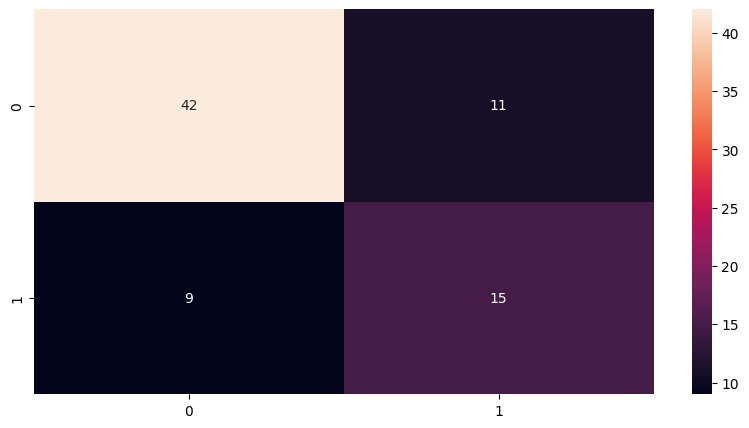

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print('Gradient Boosting Classifier without feature scaling')
# Accuracy
print('--'*10)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc) * 100,2)
print('Accuracy', gbc_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, y_pred_gbc)
recall = recall_score(y_test, y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

##4.a.ii. With only feature scaling (without target variable)

In [28]:
#Scaling features
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x)
x_transform = scaler.fit_transform(x)

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size= .10, random_state= 101)

Logistic Regression with only feature scaling
--------------------
Accuracy 81.82 %
Precision: 0.75
Recall: 0.62
--------------------


<Axes: >

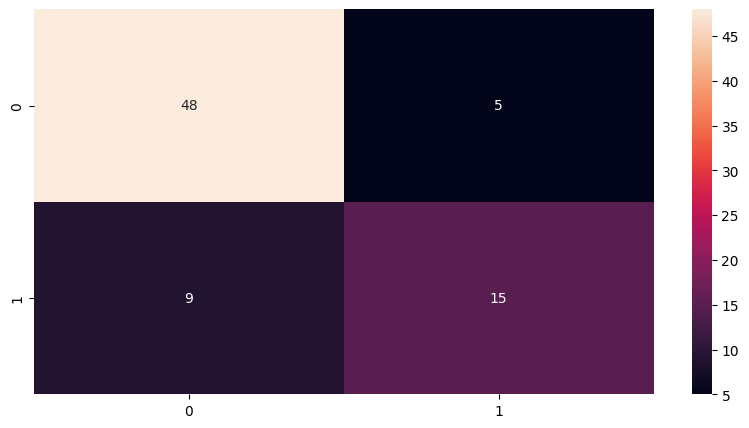

In [29]:
#Logistic Regression

# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

# prediction from the model
xs_y_pred_log_reg = log_reg.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Score It
print('Logistic Regression with only feature scaling')
# Accuracy
print('--'*10)
log_reg_accuracy = round(accuracy_score(y_test, xs_y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, xs_y_pred_log_reg)
recall = recall_score(y_test, xs_y_pred_log_reg)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, xs_y_pred_log_reg)
sns.heatmap(confusion, annot=True, fmt="d")

Decision Tree Classifier with only feature scaling
--------------------
Accuracy 70.13 %
Precision: 0.52
Recall: 0.71
--------------------


<Axes: >

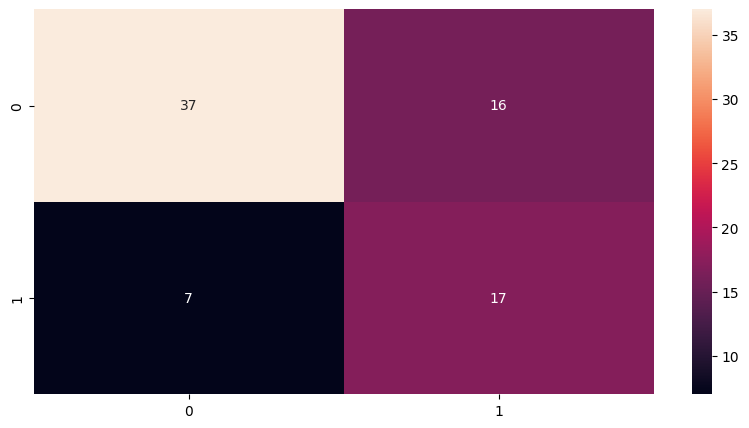

In [30]:
#Decision Tree Classifier

# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

# prediction from the model
xs_y_pred_Dtree = Dtree.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Score It
print('Decision Tree Classifier with only feature scaling')
# Accuracy
print('--'*10)
log_reg_accuracy = round(accuracy_score(y_test, xs_y_pred_Dtree) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, xs_y_pred_Dtree)
recall = recall_score(y_test, xs_y_pred_Dtree)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, xs_y_pred_Dtree)
sns.heatmap(confusion, annot=True, fmt="d")

Random Forest Classifier with only feature scaling
--------------------
Accuracy 79.22 %
Precision: 0.67
Recall: 0.67
--------------------


<Axes: >

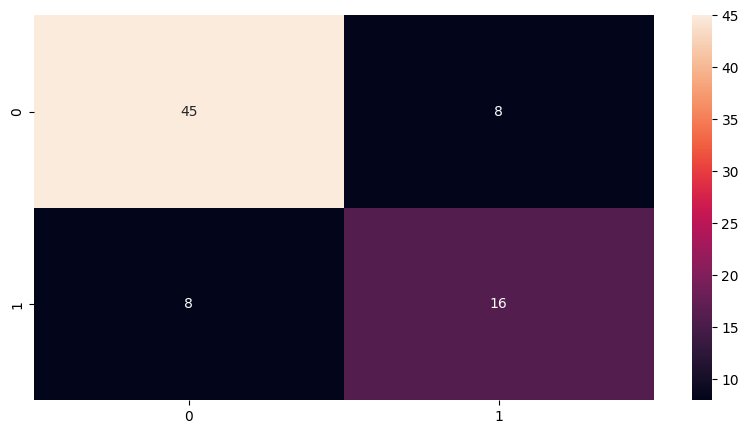

In [31]:
#Random Forest Classifier

# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)

# prediction from the model
xs_y_pred_rfc = rfc.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Score It
print('Random Forest Classifier with only feature scaling')
# Accuracy
print('--'*10)
log_reg_accuracy = round(accuracy_score(y_test, xs_y_pred_rfc) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, xs_y_pred_rfc)
recall = recall_score(y_test, xs_y_pred_rfc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, xs_y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

Gradient Boosting Classifier with only feature scaling
--------------------
Accuracy 74.03 %
Precision: 0.58
Recall: 0.62
--------------------


<Axes: >

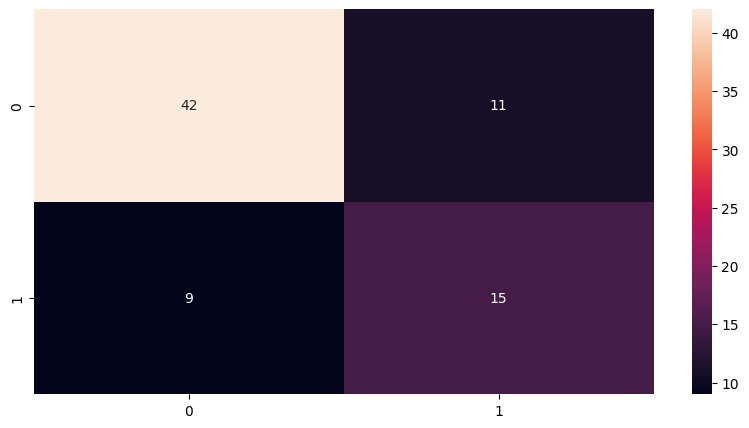

In [32]:
#Gradient Boosting Classifier

# Create instance of model
gbc = GradientBoostingClassifier()

# Pass training data into model
gbc.fit(x_train, y_train)

# prediction from the model
xs_y_pred_gbc = gbc.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Score It
print('Gradient Boosting Classifier with only feature scaling')
# Accuracy
print('--'*10)
log_reg_accuracy = round(accuracy_score(y_test, xs_y_pred_gbc) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

# Calculate precision and recall
precision = precision_score(y_test, xs_y_pred_gbc)
recall = recall_score(y_test, xs_y_pred_gbc)

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*10)
# Calculate confusion matrix
confusion = confusion_matrix(y_test, xs_y_pred_gbc)
sns.heatmap(confusion, annot=True, fmt="d")

##4.a.iii. With feature and target variable scaling
Since the target variable is categorical data (1 and 0), scaling the target variable is not necessary. There will be no impact on the evaluation metrics even if we transform them because their values will remain unchanged.

##4.b. What evaluation metric should we use and why provide the reason for that.
In general, recall is used in medical diagnostic. Because if we a disease is not predicted timely and accurately, it can lead to serious consequences.

In our dataset, we will prefer recall over other metrics.